<a href="https://colab.research.google.com/github/Ratnesh1210/deep-learning-models/blob/RNN/rnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df

,Unnamed: 0,Text,Label
0,0,from phill hallam baker subject re waco s...,politics
1,1,from matthew t russotto subject re welco...,politics
2,2,from russ curry subject re janet reno kil...,politics
3,3,from paul havemann subject re gore throws...,politics
4,4,from clinton gore subject clinton pre...,politics
...,...,...,...
5346,5346,from alan sepinwall subject re wfan in a...,baseball
5347,5347,from sherri nichols subject re relative v...,baseball
5348,5348,from david robert walker subject re how t...,baseball
5349,5349,from dale stephenson subject re giants g...,baseball


In [ ]:
df['Label'].value_counts()

Label
hockey             993
medical_science    987
baseball           987
space              984
politics           775
religion           625
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5351 non-null   int64 
 1   Text        5351 non-null   object
 2   Label       5351 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.5+ KB


In [ ]:
df.dropna(subset=['Label'], inplace=True)

In [ ]:
df

,Unnamed: 0,Text,Label
0,0,from phill hallam baker subject re waco s...,politics
1,1,from matthew t russotto subject re welco...,politics
2,2,from russ curry subject re janet reno kil...,politics
3,3,from paul havemann subject re gore throws...,politics
4,4,from clinton gore subject clinton pre...,politics
...,...,...,...
5346,5346,from alan sepinwall subject re wfan in a...,baseball
5347,5347,from sherri nichols subject re relative v...,baseball
5348,5348,from david robert walker subject re how t...,baseball
5349,5349,from dale stephenson subject re giants g...,baseball


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
# Tokenization and stop word removal function
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Preprocess the text
df['Text'] = df['Text'].apply(preprocess_text)





In [ ]:
df['Text']

0       phill hallam baker subject waco survivors apri...
1       matthew russotto subject welcome police state ...
2       russ curry subject janet reno killed waco chil...
3       paul havemann subject gore throws first ball m...
4       clinton gore subject clinton president radio i...
                              ...                        
5346    alan sepinwall subject wfan article ian derby ...
5347    sherri nichols subject relative value players ...
5348    david robert walker subject speed games margin...
5349    dale stephenson subject giants gm quinn genius...
5350    liberalizer michael lurie subject yankee medit...
Name: Text, Length: 5351, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

# Pad sequences to make them uniform length
max_len = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [ ]:
sequences_padded

array([[   0,    0,    0, ..., 1670, 2239, 1654],
       [   0,    0,    0, ..., 3227,  335, 1135],
       [   0,    0,    0, ...,   61,  905, 6548],
       ...,
       [   0,    0,    0, ...,   18,  480, 9204],
       [   0,    0,    0, ...,  144, 2325, 5156],
       [   0,    0,    0, ..., 2392, 1916,   19]], dtype=int32)

In [ ]:
label_mapping = {label: i for i, label in enumerate(df['Label'].unique())}
labels = df['Label'].map(label_mapping)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels, test_size=0.2, random_state=42)

# Build and train RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(len(label_mapping), activation='softmax'))
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)










Epoch 1/3
27/27 [==============================] - 276s 10s/step - loss: 1.6860 - accuracy: 0.3233 - val_loss: 1.5544 - val_accuracy: 0.4393
Epoch 2/3
27/27 [==============================] - 279s 10s/step - loss: 0.9817 - accuracy: 0.9159 - val_loss: 1.2351 - val_accuracy: 0.5654
Epoch 3/3
27/27 [==============================] - 284s 11s/step - loss: 0.4411 - accuracy: 0.9880 - val_loss: 1.1829 - val_accuracy: 0.5654


In [ ]:
input_dim=len(tokenizer.word_index)
input_dim

43228

In [ ]:
# Build and train LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(len(label_mapping), activation='softmax'))
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
27/27 [==============================] - 643s 23s/step - loss: 1.7405 - accuracy: 0.2795 - val_loss: 1.5118 - val_accuracy: 0.4089
Epoch 2/3
27/27 [==============================] - 622s 23s/step - loss: 1.3285 - accuracy: 0.4544 - val_loss: 1.0955 - val_accuracy: 0.6028
Epoch 3/3
27/27 [==============================] - 622s 23s/step - loss: 0.8655 - accuracy: 0.7427 - val_loss: 0.8516 - val_accuracy: 0.7512


In [ ]:

# Build and train GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
gru_model.add(GRU(64))
gru_model.add(Dense(len(label_mapping), activation='softmax'))
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
27/27 [==============================] - 612s 22s/step - loss: 1.7565 - accuracy: 0.3148 - val_loss: 1.6908 - val_accuracy: 0.4860
Epoch 2/3
27/27 [==============================] - 568s 21s/step - loss: 1.4304 - accuracy: 0.6037 - val_loss: 1.1940 - val_accuracy: 0.5736
Epoch 3/3
27/27 [==============================] - 542s 20s/step - loss: 0.7093 - accuracy: 0.7348 - val_loss: 0.7597 - val_accuracy: 0.6928


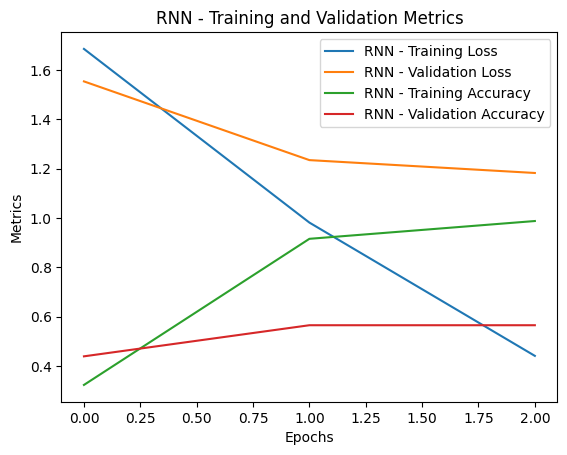

In [ ]:
# Plot RNN model training and validation metrics
import matplotlib.pyplot as plt

plt.plot(rnn_history.history['loss'], label='RNN - Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN - Validation Loss')
plt.plot(rnn_history.history['accuracy'], label='RNN - Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN - Validation Accuracy')
plt.title('RNN - Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

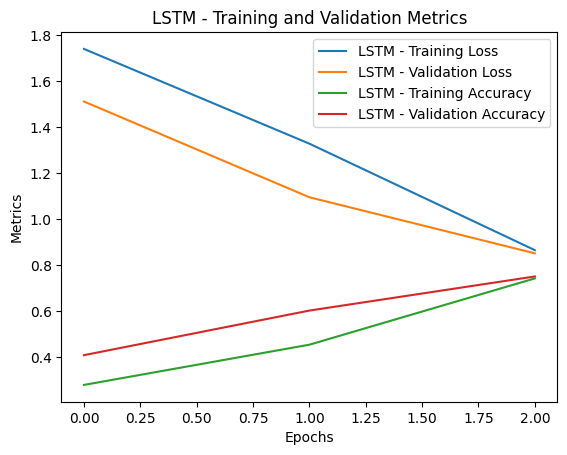

In [ ]:
# Plot LSTM model training and validation metrics
plt.plot(lstm_history.history['loss'], label='LSTM - Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM - Validation Loss')
plt.plot(lstm_history.history['accuracy'], label='LSTM - Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM - Validation Accuracy')
plt.title('LSTM - Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

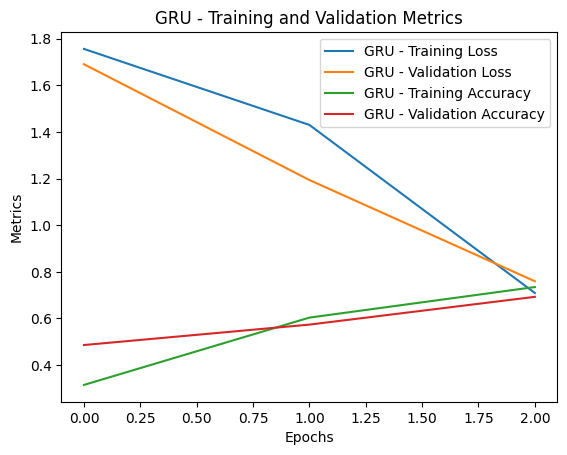

In [ ]:
# Plot GRU model training and validation metrics
plt.plot(gru_history.history['loss'], label='GRU - Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU - Validation Loss')
plt.plot(gru_history.history['accuracy'], label='GRU - Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU - Validation Accuracy')
plt.title('GRU - Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Make predictions using RNN model
rnn_predictions = rnn_model.predict(X_test)

# Make predictions using LSTM model
lstm_predictions = lstm_model.predict(X_test)

# Make predictions using GRU model
gru_predictions = gru_model.predict(X_test)

# Example: Convert predictions back to label names
rnn_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in rnn_predictions]
lstm_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in lstm_predictions]
gru_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in gru_predictions]

# Example: Print first 10 predictions and true labels for RNN model
print("RNN Predictions:")
for i in range(10):
    print(f"Predicted: {rnn_predicted_labels[i]}, True: {df['Label'].iloc[i]}")

# Example: Print first 10 predictions and true labels for LSTM model
print("\nLSTM Predictions:")
for i in range(10):
    print(f"Predicted: {lstm_predicted_labels[i]}, True: {df['Label'].iloc[i]}")

# Example: Print first 10 predictions and true labels for GRU model
print("\nGRU Predictions:")
for i in range(10):
    print(f"Predicted: {gru_predicted_labels[i]}, True: {df['Label'].iloc[i]}")


34/34 [==============================] - 31s 902ms/step
RNN Predictions:
Predicted: hockey, True: politics
Predicted: space, True: politics
Predicted: medical_science, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: politics, True: politics
Predicted: politics, True: politics
Predicted: space, True: politics
Predicted: medical_science, True: politics
Predicted: hockey, True: politics

LSTM Predictions:
Predicted: hockey, True: politics
Predicted: medical_science, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: medical_science, True: politics
Predicted: politics, True: politics
Predicted: politics, True: politics
Predicted: space, True: politics
Predicted: medical_science, True: politics
Predicted: hockey, True: politics

GRU Predictions:
Predicted: hockey, True: politics
Predicted: medical_science, True: politics
Predicted: politics, True: politics
Predicted: hockey, True: politics
Predicted: ho

In [ ]:
from keras.layers import Flatten

# Build and train FNN model
fnn_model = Sequential()
fnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
fnn_model.add(Flatten())
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dense(len(label_mapping), activation='softmax'))
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fnn_history = fnn_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Make predictions using FNN model
fnn_predictions = fnn_model.predict(X_test)

# Example: Convert predictions back to label names
fnn_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in fnn_predictions]

# Example: Print first 10 predictions and true labels for FNN model
print("\nFNN Predictions:")
for i in range(10):
    print(f"Predicted: {fnn_predicted_labels[i]}, True: {df['Label'].iloc[i]}")


Epoch 1/3
27/27 [==============================] - 76s 3s/step - loss: 6.5234 - accuracy: 0.1662 - val_loss: 1.8063 - val_accuracy: 0.1133
Epoch 2/3
27/27 [==============================] - 69s 3s/step - loss: 1.7981 - accuracy: 0.1735 - val_loss: 1.8014 - val_accuracy: 0.1799
Epoch 3/3
34/34 [==============================] - 5s 137ms/step

FNN Predictions:
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
Predicted: hockey, True: politics
